# 1.Importación librerías

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 2.Importación fuente de datos

In [8]:
#Fuente datos: https://www.kaggle.com/alxmamaev/flowers-recognition
mi_directorio = 'G:\Mi unidad\Creación de MOCs\MOC Deep Learning\Scripts\CNN Imágenes RGB\Flores'

In [10]:
# Confirmar que tenemos las carpetas 'test' y 'train'
os.listdir(mi_directorio) 

['train', 'test']

In [11]:
train_path = mi_directorio+'\\train\\'
test_path = mi_directorio+'\\test\\'

In [12]:
os.listdir(train_path)

['Rosa', 'Girasol', 'Diente de León', 'Margarita', 'Tulipán', 'desktop.ini']

In [13]:
os.listdir(test_path)

['Margarita', 'Girasol', 'Diente de León', 'Rosa', 'Tulipán', 'desktop.ini']

# 3.Preprocesado

## 3.1Visualización de imágenes

In [14]:
os.listdir(train_path+'\\Diente de León')[0]

'10777398353_5a20bb218c.jpg'

In [15]:
ruta_dienteleon = train_path+'\\Diente de León'+'\\10043234166_e6dd915111_n.jpg'

In [16]:
imagen_dienteleon= imread(ruta_dienteleon)

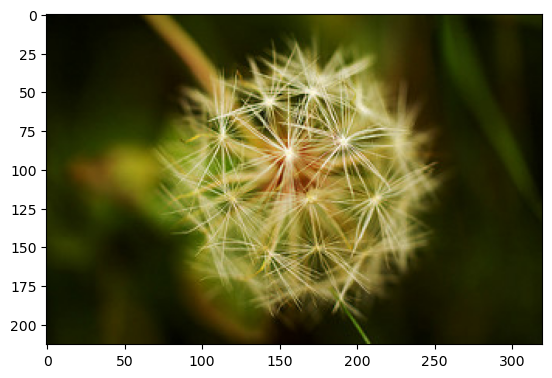

In [17]:
plt.imshow(imagen_dienteleon)

In [18]:
imagen_dienteleon.shape

(213, 320, 3)

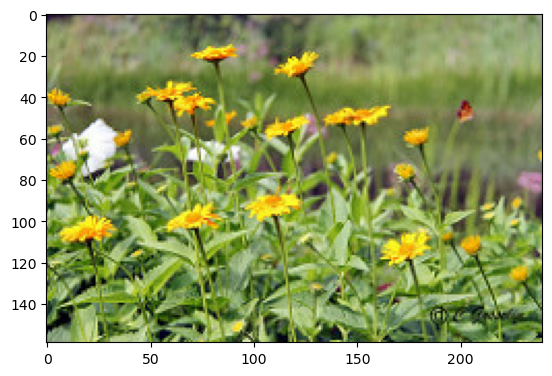

In [19]:
ruta_margarita = train_path+'\\Margarita\\'+os.listdir(train_path+'\\Margarita')[0]
imagen_margarita = imread(ruta_margarita)
plt.imshow(imagen_margarita)

**¿Cuántas imágenes tenemos en la carpeta de entrenamiento**

In [20]:
len(os.listdir(train_path+'\\Diente de León'))

953

In [21]:
len(os.listdir(train_path+'\\Girasol'))

635

In [22]:
len(os.listdir(train_path+'\\Margarita'))

670

In [23]:
len(os.listdir(train_path+'\\Rosa'))

685

In [24]:
len(os.listdir(train_path+'\\Tulipán'))

885

## 3.2 Calcular dimensiones promedio

In [25]:
#Debemos calcular unas dimensiones promedio que serán las que posteriormente pasemos a la CNN

In [26]:
imagen_dienteleon.shape

(213, 320, 3)

In [27]:
imagen_margarita.shape

(159, 240, 3)

In [29]:
dim1_ddl = []
dim2_ddl = []
for fichero_imagen in os.listdir(train_path+'\\Diente de León'):
    
    img = imread(train_path+'\\Diente de León'+'\\'+fichero_imagen)
    d1,d2,colors = img.shape
    dim1_ddl.append(d1)
    dim2_ddl.append(d2)

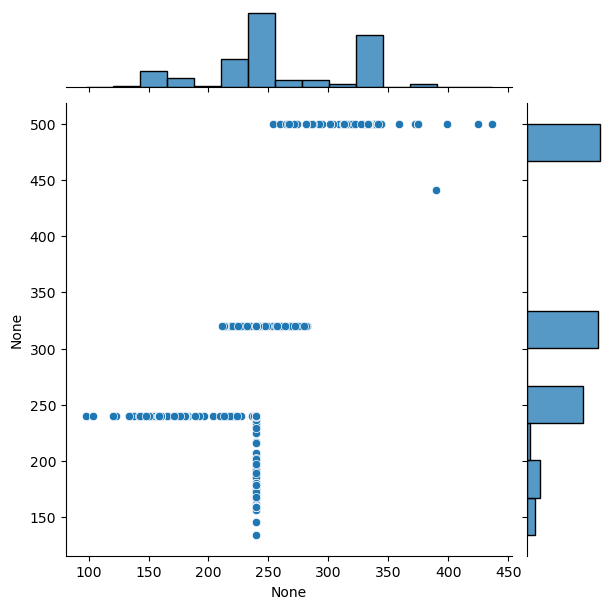

In [31]:
sns.jointplot(x=dim1_ddl,y=dim2_ddl)

In [32]:
np.mean(dim1_ddl)

np.float64(255.85294117647058)

In [33]:
np.mean(dim2_ddl)

np.float64(344.24789915966386)

In [34]:
#Calcular resto categorías
dim1_gir = []
dim2_gir = []
for fichero_imagen in os.listdir(train_path+'\\Girasol'):
    
    img = imread(train_path+'\\Girasol'+'\\'+fichero_imagen)
    d1,d2,colors = img.shape
    dim1_gir.append(d1)
    dim2_gir.append(d2)
    
dim1_mar = []
dim2_mar = []
for fichero_imagen in os.listdir(train_path+'\\Margarita'):
    
    img = imread(train_path+'\\Margarita'+'\\'+fichero_imagen)
    d1,d2,colors = img.shape
    dim1_mar.append(d1)
    dim2_mar.append(d2)
    
dim1_rosa = []
dim2_rosa = []
for fichero_imagen in os.listdir(train_path+'\\Rosa'):
    
    img = imread(train_path+'\\Rosa'+'\\'+fichero_imagen)
    d1,d2,colors = img.shape
    dim1_rosa.append(d1)
    dim2_rosa.append(d2)
    
dim1_tul = []
dim2_tul = []
for fichero_imagen in os.listdir(train_path+'\\Tulipán'):
    
    img = imread(train_path+'\\Tulipán'+'\\'+fichero_imagen)
    d1,d2,colors = img.shape
    dim1_tul.append(d1)
    dim2_tul.append(d2)

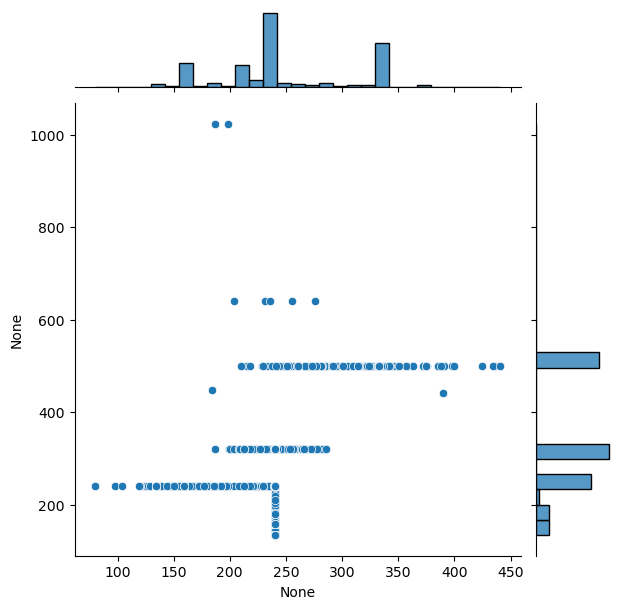

In [36]:
#Representamos las dimensiones de las imágenes de todas las categorías
sns.jointplot(x=dim1_ddl+dim1_gir+dim1_mar+dim1_rosa+dim1_tul,y=dim2_ddl+dim2_gir+dim2_mar+dim2_rosa+dim2_tul)
plt.show()

In [37]:
np.mean(dim1_ddl+dim1_gir+dim1_mar+dim1_rosa+dim1_tul)

np.float64(248.3693434475543)

In [38]:
np.mean(dim2_ddl+dim2_gir+dim2_mar+dim2_rosa+dim2_tul)

np.float64(332.7849856133926)

In [39]:
image_shape = (250,335,3)

# 3.3 Manipulación de imágenes

Es buena idea manipular las imágenes con rotaciones, reescalados, desplazamientos,... para hacer más robusto al modelo 
con más imágenes (artificiales) que nuestros dataset no contiene --> **ImageDataGenerator**

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.src.legacy.preprocessing.image:

class ImageDataGenerator(builtins.object)
 |  ImageDataGenerator(
 |      featurewise_center=False,
 |      samplewise_center=False,
 |      featurewise_std_normalization=False,
 |      samplewise_std_normalization=False,
 |      zca_whitening=False,
 |      zca_epsilon=1e-06,
 |      rotation_range=0,
 |      width_shift_range=0.0,
 |      height_shift_range=0.0,
 |      brightness_range=None,
 |      shear_range=0.0,
 |      zoom_range=0.0,
 |      channel_shift_range=0.0,
 |      fill_mode='nearest',
 |      cval=0.0,
 |      horizontal_flip=False,
 |      vertical_flip=False,
 |      rescale=None,
 |      preprocessing_function=None,
 |      data_format=None,
 |      validation_split=0.0,
 |      interpolation_order=1,
 |      dtype=None
 |  )
 |
 |  DEPRECATED.
 |
 |  Methods defined here:
 |
 |  __init__(
 |      self,
 |      featurewise_center=False,
 |      samplewise_center=False,
 |      featur

In [43]:
image_gen = ImageDataGenerator(rotation_range=20, # rotación máxima de 20º (depende del caso de uso)
                               width_shift_range=0.10, # Desplazamiento en la anchura máximo del -5% --- +5%
                               height_shift_range=0.10, # Desplazamiento en la altura máximo del -5% --- +5%
                               rescale=1/255, # Reescalar la imagen para normalizarla entre 0-1
                               shear_range=0.1, # Distorsión de la imagen a partir de un eje - persepectiva (max 10%)
                               zoom_range=0.1, # Zoom in máximo 10%
                               horizontal_flip=True, # Permitir giro horizontal de la imagen (espejo)
                               fill_mode='nearest' # Rellenar píxeles vacíos con el valor más cercano
                              )

#Ejemplos de manipulación de imágenes: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

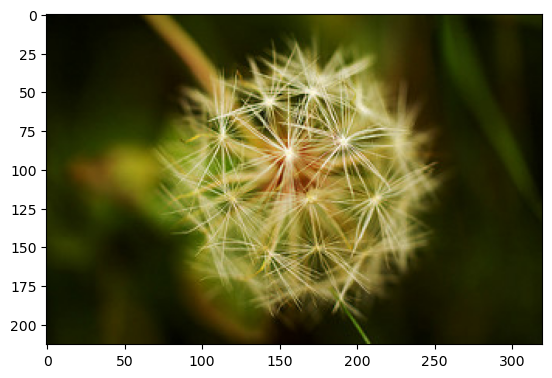

In [44]:
plt.imshow(imagen_dienteleon)

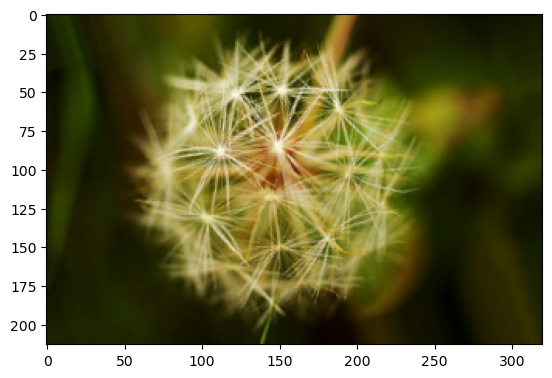

In [45]:
plt.imshow(image_gen.random_transform(imagen_dienteleon))

Para poder generar imágenes manipuladas desde un directorio, debe haber una carpeta por clase de imágenes:
* Carpeta de imágenes
    * Clase 1
        * 0.jpg
        * 1.jpg
        * ...
    * Clase 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Clase n

In [46]:
image_gen.flow_from_directory(train_path)

Found 3823 images belonging to 5 classes.


In [47]:
image_gen.flow_from_directory(test_path)

Found 500 images belonging to 5 classes.


In [48]:
batch_size = 16 #Definimos un batch_size en función de la RAM

In [49]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2], #image_shape = (250,335,3), target_size solo necesita anchura x altura
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical') #binary si clasificación binaria

Found 3823 images belonging to 5 classes.


In [50]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=False) #En el conjunto de test no aplicamos shuffle para no "barajar" las imágenes

Found 500 images belonging to 5 classes.


In [51]:
train_image_gen.class_indices

{'Diente de León': 0, 'Girasol': 1, 'Margarita': 2, 'Rosa': 3, 'Tulipán': 4}

# 4.Creación del Modelo

In [55]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

In [56]:
#En Tensorflow 2.2 se recomienda no usar el método model.add, sino crear el modelo secuencia directamente insertando las capas durante la creación del modelo secuencial:
model = Sequential([
    Input(shape=image_shape),                            # solo aquí defines la entrada
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(5, activation='softmax')  # 5 clases
])

model.compile(
    loss='categorical_crossentropy',  # usa sparse_categorical si NO tienes one-hot
    optimizer='adam',
    metrics=['accuracy']
)

In [57]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 248, 333, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 124, 166, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 122, 164, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 61, 82, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 59, 80, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 29, 40, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 74240)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       9,502,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,559,813 (36.47 MB)

 Trainable params: 9,559,813 (36.47 MB)

 Non-trainable params: 0 (0.00 B)

# 5.Entrenamiento del modelo

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
results = model.fit(train_image_gen,
                              epochs=5,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

Epoch 1/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 112s 465ms/step - accuracy: 0.3913 - loss: 1.4248 - val_accuracy: 0.5100 - val_loss: 1.2116
Epoch 2/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 109s 455ms/step - accuracy: 0.5035 - loss: 1.1920 - val_accuracy: 0.6080 - val_loss: 1.0063
Epoch 3/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 109s 456ms/step - accuracy: 0.5752 - loss: 1.0952 - val_accuracy: 0.6120 - val_loss: 0.9478
Epoch 4/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 110s 460ms/step - accuracy: 0.6181 - loss: 1.0052 - val_accuracy: 0.6500 - val_loss: 0.9311
Epoch 5/5
239/239 ━━━━━━━━━━━━━━━━━━━━ 109s 458ms/step - accuracy: 0.6314 - loss: 0.9600 - val_accuracy: 0.6500 - val_loss: 0.9058


In [63]:
from tensorflow.keras.models import load_model
model.save('modelo_CNN_flores.keras')

In [64]:
losses = pd.DataFrame(model.history.history)

<Axes: >

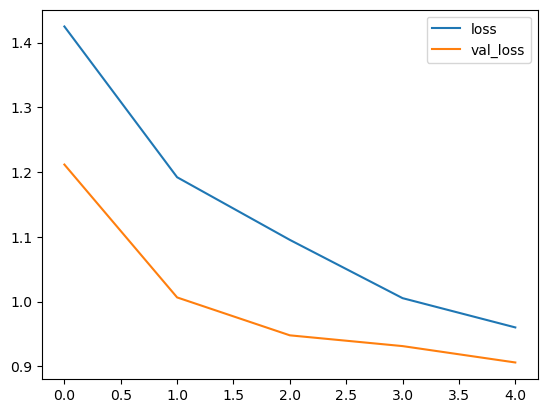

In [65]:
losses[['loss','val_loss']].plot()

<Axes: >

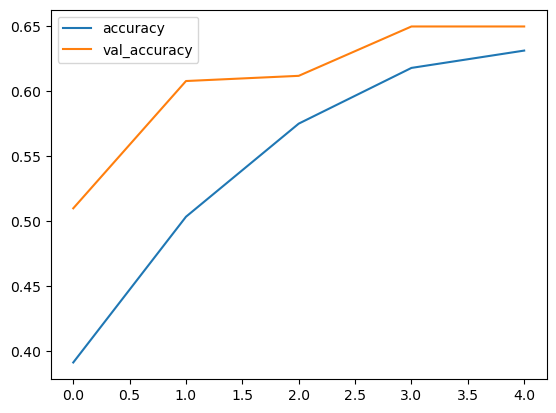

In [66]:
losses[['accuracy','val_accuracy']].plot()

# 6. Evaluación del modelo

## 6.1 Predicción sobre el conjunto de Test

In [67]:
model.metrics_names

['loss', 'compile_metrics']

In [70]:
loss, acc = model.evaluate(test_image_gen)

32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step - accuracy: 0.6420 - loss: 0.9173


In [71]:
loss, acc

(0.9172589778900146, 0.6420000195503235)

In [73]:
pred_probabilities = model.predict(test_image_gen)

32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step


In [74]:
pred_probabilities

array([[7.5746924e-01, 1.7586756e-02, 1.2178726e-01, 5.3514414e-02,
        4.9642440e-02],
       [5.3177815e-02, 2.5850041e-03, 8.9540225e-01, 2.6674671e-02,
        2.2160346e-02],
       [8.0204195e-01, 1.5659594e-03, 1.4514671e-01, 3.3744600e-02,
        1.7500764e-02],
       ...,
       [1.1744243e-12, 4.5307287e-09, 7.1897283e-10, 2.0099434e-03,
        9.9799001e-01],
       [4.1261251e-06, 1.4704138e-03, 1.2766864e-04, 3.3513281e-02,
        9.6488446e-01],
       [2.7110257e-06, 1.1124349e-03, 3.8344915e-05, 1.3897113e-02,
        9.8494935e-01]], dtype=float32)

In [75]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [77]:
predictions = np.argmax(model.predict(test_image_gen), axis=-1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 323ms/step


In [78]:
predictions

array([0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 1,
       4, 0, 1, 0, 2, 4, 0, 2, 0, 4, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 3, 2, 2, 2, 2, 0, 2, 4, 4, 4, 2, 2, 3, 2, 3, 2, 3, 3,
       2, 4, 2, 2, 2, 2, 4, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 4, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 4, 2, 2, 0, 1, 0, 4, 2, 2, 1, 2, 1, 2, 2,
       1, 4, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 3,

In [79]:
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       100
           1       0.64      0.91      0.75       100
           2       0.74      0.62      0.67       100
           3       0.67      0.32      0.43       100
           4       0.60      0.81      0.69       100

    accuracy                           0.66       500
   macro avg       0.67      0.66      0.64       500
weighted avg       0.67      0.66      0.64       500



In [81]:
confusion_matrix(test_image_gen.classes,predictions)

array([[63, 25,  9,  0,  3],
       [ 5, 91,  2,  1,  1],
       [14, 10, 62,  5,  9],
       [ 6, 10, 10, 32, 42],
       [ 2,  6,  1, 10, 81]])

<Axes: >

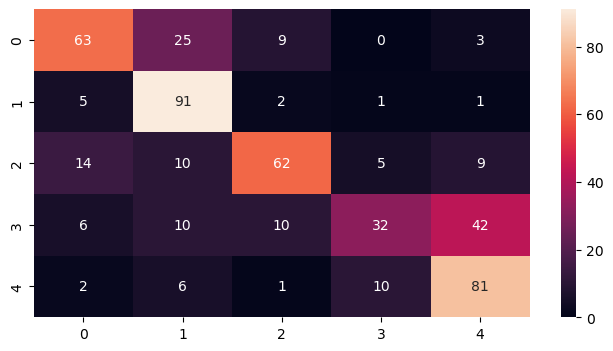

In [82]:
plt.figure(figsize=(8,4))
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions),annot=True)

## 6.2 Predicción para una nueva imagen

In [83]:
ruta_nueva_imagen = train_path+'\\Rosa\\'+os.listdir(train_path+'\\Rosa')[45]

In [84]:
from tensorflow.keras.preprocessing import image

In [85]:
nueva_imagen = image.load_img(ruta_nueva_imagen,target_size=image_shape)

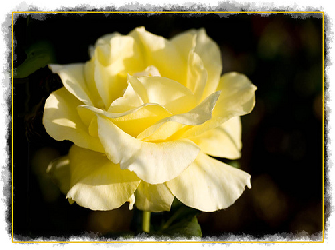

In [86]:
nueva_imagen

In [87]:
type(nueva_imagen)

PIL.Image.Image

In [89]:
nueva_imagen = image.img_to_array(nueva_imagen)

In [90]:
type(nueva_imagen)

numpy.ndarray

In [91]:
nueva_imagen.shape

(250, 335, 3)

In [92]:
nueva_imagen = np.expand_dims(nueva_imagen, axis=0)

In [93]:
nueva_imagen.shape

(1, 250, 335, 3)

In [94]:
model.predict(nueva_imagen) #Detecta la clase 3 = rosa

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[0., 1., 0., 0., 0.]], dtype=float32)

In [95]:
test_image_gen.class_indices

{'Diente de León': 0, 'Girasol': 1, 'Margarita': 2, 'Rosa': 3, 'Tulipán': 4}